In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import re
import string

In [13]:
import os
os.getcwd()


'C:\\Users\\HP'

In [19]:
import pandas as pd
df = pd.read_csv('flipkart_reviews_sample.csv')
df.head()

,review,sentiment
0,"Great phone, totally worth the money!",1
1,Terrible experience. Battery died in a week.,0
2,Amazing camera quality and smooth performance.,1
3,Not good. Hangs too much.,0
4,Decent product for the price.,1


In [21]:
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df['cleaned_review'] = df['review'].apply(clean_text)
df[['review', 'cleaned_review']].head()

,review,cleaned_review
0,"Great phone, totally worth the money!",great phone totally worth the money
1,Terrible experience. Battery died in a week.,terrible experience battery died in a week
2,Amazing camera quality and smooth performance.,amazing camera quality and smooth performance
3,Not good. Hangs too much.,not good hangs too much
4,Decent product for the price.,decent product for the price


In [23]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [27]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print(classification_report(y_test, log_preds))

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [29]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds))


Naive Bayes Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



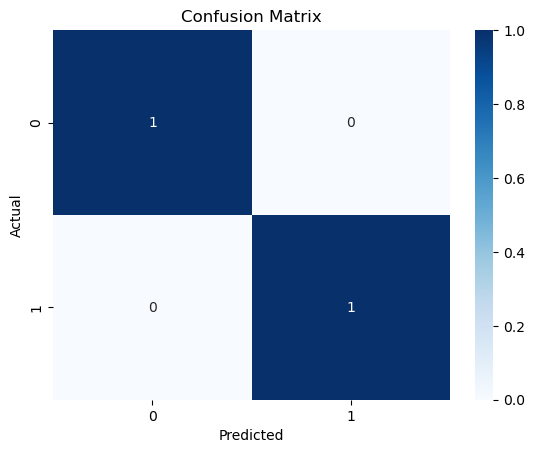

In [31]:
cm = confusion_matrix(y_test, log_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [33]:
def predict_sentiment(text):
    text = clean_text(text)
    vector = vectorizer.transform([text])
    prediction = log_model.predict(vector)
    return "Positive" if prediction[0] == 1 else "Negative"

# Example
predict_sentiment("The product quality is awesome and delivery was fast.")

'Positive'